In [24]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
from tqdm.auto import tqdm
from sklearn import metrics
import seaborn as sns
import pandas as pd

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
def calculate_accuracy(predictions, grs):
    """Multiclass problem accuracy"""
    predictions = torch.softmax(predictions, dim=1)
    predictions = torch.argmax(predictions, dim=1)
    return (torch.sum(predictions == grs) / len(grs)).item()

In [27]:
def classification_loop(train_loader, test_loader, model, criterion, optimizer, epochs, device="cpu"):
    """Training loop for c-class classification problem"""
    train_loss_history = []
    test_loss_history = []
    for epoch in tqdm(range(epochs)):
        train_loss = 0.0
        train_acc = 0.0
        test_loss = 0.0
        test_acc = 0.0
        model.train()
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            model.zero_grad()
            predictions = model(x_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += calculate_accuracy(predictions, y_batch)
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        train_loss_history.append(train_loss)

        with torch.inference_mode():
            model.eval()
            for x_test_batch, y_test_batch in test_loader:
                x_test_batch, y_test_batch = x_test_batch.to(device), y_test_batch.to(device)
                test_predictions = model(x_test_batch)
                test_loss += criterion(test_predictions, y_test_batch).item()
                test_acc += calculate_accuracy(test_predictions, y_test_batch)
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        test_loss_history.append(test_loss)
        print(f"Epoch: {epoch} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} |\
Test acc: {test_acc}")
    return train_loss_history, test_loss_history

In [28]:
def make_confusion_matrix(loader, model, labels, device):
    with torch.inference_mode():
        test_predictions = []
        test_grs = []
        for x, y in loader:
            x = x.to(device)
            preds = model(x)
            test_predictions += list(torch.argmax(preds, dim=1).cpu())
            test_grs += list(y)
    plt.figure(figsize=(12, 9))
    sns.heatmap(metrics.confusion_matrix(test_grs, test_predictions),
                xticklabels=labels,
                yticklabels=labels,
                cmap="viridis",
                annot=True);

Классификация фигурок марвел и звездных воинов

1. linear

In [138]:
class LettersModel(nn.Module):

    def __init__(self,
                 in_neurons: int,
                 hidden_neurons: int,
                 out_neurons: int,
                 apply_softmax: bool = False):
        super(LettersModel, self).__init__()
        self.fc1 = nn.Linear(in_neurons, hidden_neurons)
        self.fc2 = nn.Linear(hidden_neurons, hidden_neurons * 5)
        self.fc3 = nn.Linear(hidden_neurons * 5, hidden_neurons* 10)
        self.fc4 = nn.Linear(hidden_neurons * 10, hidden_neurons* 15)
        self.fc5 = nn.Linear(hidden_neurons * 15, hidden_neurons* 25)
        self.fc6 = nn.Linear(hidden_neurons * 25, hidden_neurons* 35)
        self.fc7 = nn.Linear(hidden_neurons * 35, hidden_neurons* 45)
        self.fc8 = nn.Linear(hidden_neurons * 45, hidden_neurons* 45)
        self.fc9 = nn.Linear(hidden_neurons * 45, hidden_neurons* 45)
        self.fc10 = nn.Linear(hidden_neurons * 45, hidden_neurons* 45)
        self.fc11 = nn.Linear(hidden_neurons * 45, hidden_neurons* 35)
        self.fc12 = nn.Linear(hidden_neurons * 35, hidden_neurons* 25)
        self.fc13 = nn.Linear(hidden_neurons * 25, hidden_neurons* 15)
        self.fc14 = nn.Linear(hidden_neurons * 15, hidden_neurons* 10)
        self.fc15 = nn.Linear(hidden_neurons* 10, out_neurons)
        self.batch_norm1 = nn.BatchNorm1d(hidden_neurons)
        self.batch_norm2 = nn.BatchNorm1d(hidden_neurons * 5)
        self.batch_norm3 = nn.BatchNorm1d(hidden_neurons * 10)
        self.batch_norm4 = nn.BatchNorm1d(hidden_neurons * 15)
        self.batch_norm5 = nn.BatchNorm1d(hidden_neurons * 25)
        self.batch_norm6 = nn.BatchNorm1d(hidden_neurons * 35)
        self.batch_norm7 = nn.BatchNorm1d(hidden_neurons * 45)
        self.batch_norm8 = nn.BatchNorm1d(hidden_neurons * 45)
        self.batch_norm9 = nn.BatchNorm1d(hidden_neurons * 45)
        self.batch_norm10 = nn.BatchNorm1d(hidden_neurons * 45)
        self.batch_norm11 = nn.BatchNorm1d(hidden_neurons * 35)
        self.batch_norm12 = nn.BatchNorm1d(hidden_neurons * 25)
        self.batch_norm13 = nn.BatchNorm1d(hidden_neurons * 15)
        self.batch_norm14 = nn.BatchNorm1d(hidden_neurons * 10)
        self.relu = nn.LeakyReLU(0.1)
        self.softmax = nn.Softmax()
        self.apply_softmax = apply_softmax

    def forward(self, x: torch.Tensor):
        output = self.relu(self.batch_norm1(self.fc1(x)))
        output = self.relu(self.batch_norm2(self.fc2(output)))
        output = self.relu(self.batch_norm3(self.fc3(output)))
        output = self.relu(self.batch_norm4(self.fc4(output)))
        output = self.relu(self.batch_norm5(self.fc5(output)))
        output = self.relu(self.batch_norm6(self.fc6(output)))
        output = self.relu(self.batch_norm7(self.fc7(output)))
        output = self.relu(self.batch_norm8(self.fc8(output)))
        output = self.relu(self.batch_norm9(self.fc9(output)))
        output = self.relu(self.batch_norm10(self.fc10(output)))
        output = self.relu(self.batch_norm11(self.fc11(output)))
        output = self.relu(self.batch_norm12(self.fc12(output)))
        output = self.relu(self.batch_norm13(self.fc13(output)))
        output = self.relu(self.batch_norm14(self.fc14(output)))
        output = self.fc15(output)
        if self.apply_softmax:
            return self.softmax(output)
        else:
            return output

In [139]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(244),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.Grayscale(num_output_channels=1),
    transforms.ConvertImageDtype(torch.float32),
    transforms.Lambda(lambda x: torch.flatten(x, start_dim=0))
])

train_set = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/train', transform = transformations)
val_set = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/test', transform = transformations)

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size =64)

In [144]:
letters_model = LettersModel(244*244, 16, 2)
print("Number of parameters:",
      sum(p.shape[0] * p.shape[1] if len(p.shape) == 2 else p.shape[0] for p in letters_model.parameters()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(letters_model.parameters(), lr=0.005)
N_EPOCHS = 25

Number of parameters: 4062466


In [145]:
history_train, history_test = classification_loop(
    train_loader,
    val_loader,
    letters_model,
    criterion,
    optimizer,
    N_EPOCHS
)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0424424211184184 | Train acc: 0.46934524178504944 | Test loss: 0.6901307702064514 |Test acc: 0.5208333333333334
Epoch: 1 | Train loss: 0.8184541861216227 | Train acc: 0.5264880955219269 | Test loss: 0.7030500968297323 |Test acc: 0.47802337010701496
Epoch: 2 | Train loss: 0.6404895981152853 | Train acc: 0.5819940567016602 | Test loss: 1.2312891085942586 |Test acc: 0.4994918704032898
Epoch: 3 | Train loss: 0.6070298353830973 | Train acc: 0.633184532324473 | Test loss: 2.106426020463308 |Test acc: 0.5226117968559265
Epoch: 4 | Train loss: 0.5611414511998495 | Train acc: 0.7007440527280172 | Test loss: 2.066958467165629 |Test acc: 0.5297256112098694
Epoch: 5 | Train loss: 0.5712803701559702 | Train acc: 0.668750007947286 | Test loss: 1.1913236578305562 |Test acc: 0.5732977588971456
Epoch: 6 | Train loss: 0.5296598970890045 | Train acc: 0.7258928616841634 | Test loss: 1.8787810802459717 |Test acc: 0.6081046660741171
Epoch: 7 | Train loss: 0.5801117718219757 | Train 

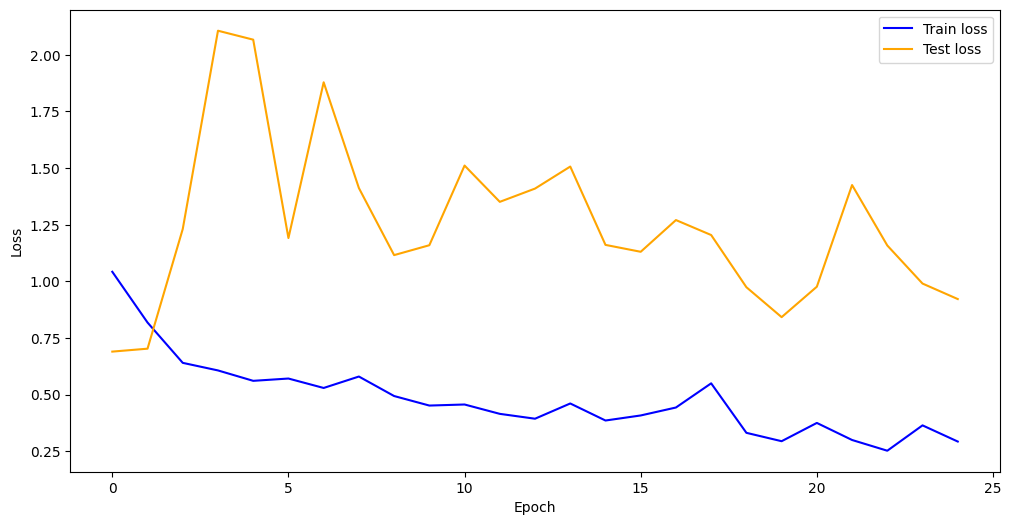

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(range(N_EPOCHS), history_train, c="blue", label="Train loss")
plt.plot(range(N_EPOCHS), history_test, c="orange", label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

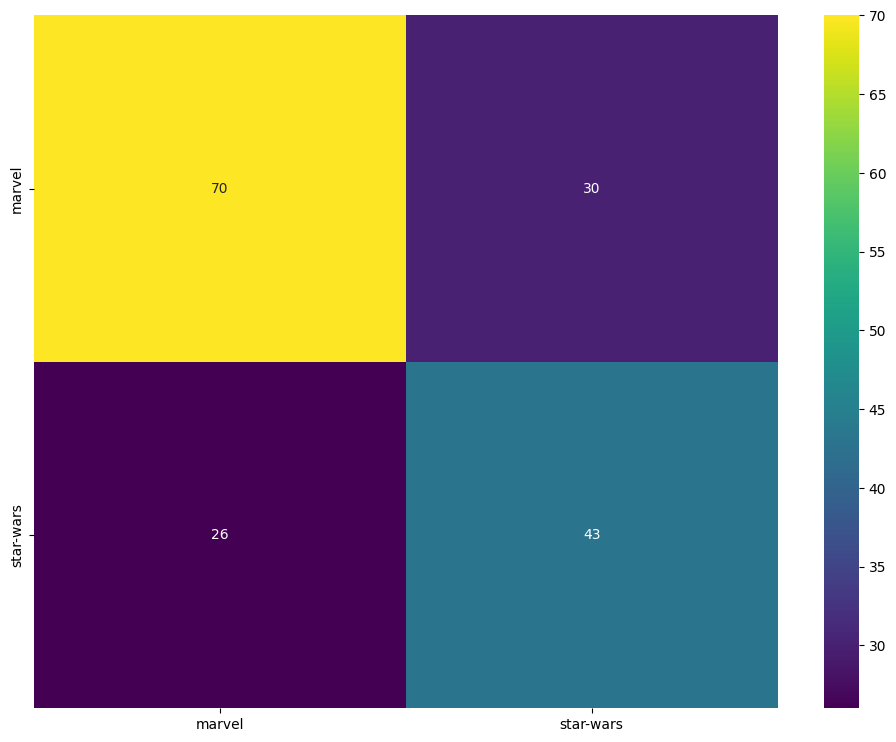

In [147]:
make_confusion_matrix(val_loader, letters_model, train_set.classes, "cpu")

2.CNN

In [250]:
class LettersConvModel(nn.Module):

  def __init__(self,
                 in_channels: int,
                 hidden_channels: int,
                 out_neurons: int,
                 apply_softmax: bool = False):
        super(LettersConvModel, self).__init__()
        # 3 x 256 x 256
        self.conv1 = nn.Conv2d(in_channels=in_channels,
                               out_channels=hidden_channels,
                               kernel_size=5,
                               stride=1,
                               padding=1)
        # hc x 254 x 254
        self.pool1 = nn.MaxPool2d(2, 2)
        # hc x 127 x 127
        self.conv2 = nn.Conv2d(in_channels=hidden_channels,
                               out_channels=hidden_channels * 3,
                               kernel_size=4,
                               stride=1,
                               padding=0)
        # 3hc x 124 x 124
        self.pool2 = nn.MaxPool2d(2, 2)
        # 3hc x 62 x 62
        self.conv3 = nn.Conv2d(in_channels=hidden_channels * 3,
                               out_channels=hidden_channels * 9,
                               kernel_size=3,
                               stride=1,
                               padding=0)
        # 9hc x 60 x 60
        self.pool3 = nn.MaxPool2d(2, 2)
        # 9hc x 30 x 30
        self.conv4 = nn.Conv2d(in_channels=hidden_channels * 9,
                               out_channels=hidden_channels * 27,
                               kernel_size=4,
                               stride=1,
                               padding=0)
        # 27hc x 27 x 27
        self.pool4 = nn.MaxPool2d(3, 3)
        # 27hc x 9 x 9
        self.flattener = nn.Flatten()
        self.fc = nn.Linear(hidden_channels * 27 * 9 * 9, out_neurons)
        self.batch_norm1 = nn.BatchNorm2d(hidden_channels)
        self.batch_norm1 = nn.BatchNorm2d(hidden_channels)
        self.batch_norm2 = nn.BatchNorm2d(hidden_channels * 3)
        self.batch_norm3 = nn.BatchNorm2d(hidden_channels * 9)
        self.batch_norm4 = nn.BatchNorm2d(hidden_channels * 27)
        self.relu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.Softmax()
        self.apply_softmax = apply_softmax

  def forward(self, x: torch.Tensor):
        output = self.dropout(self.relu(self.batch_norm1(self.pool1(self.conv1(x)))))
        output = self.dropout(self.relu(self.batch_norm2(self.pool2(self.conv2(output)))))
        output = self.dropout(self.relu(self.batch_norm3(self.pool3(self.conv3(output)))))
        output = self.dropout(self.relu(self.batch_norm4(self.pool4(self.conv4(output)))))
        output = self.flattener(output)
        output = self.fc(output)
        if self.apply_softmax:
            return self.softmax(output)
        else:
            return output

In [251]:
transformations_conv = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((256, 256))
])

train_set_conv = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/train', transform = transformations_conv)
val_set_conv = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/test', transform = transformations_conv)

train_loader_conv = torch.utils.data.DataLoader(train_set_conv, batch_size=32, shuffle=True)
val_loader_conv = torch.utils.data.DataLoader(val_set_conv, batch_size =32, shuffle=True)

In [254]:
letters_conv_model = LettersConvModel(3, 8, 2)
letters_conv_model.to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(letters_conv_model.parameters(), lr=0.012)
N_EPOCHS = 15

In [255]:
history_train, history_test = classification_loop(
    train_loader_conv,
    val_loader_conv,
    letters_conv_model,
    criterion,
    optimizer,
    N_EPOCHS,
    DEVICE
)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 23.806276192267735 | Train acc: 0.4322916666666667 | Test loss: 14.072354237238565 |Test acc: 0.5399305572112402
Epoch: 1 | Train loss: 10.558479309082031 | Train acc: 0.6111111144224802 | Test loss: 22.05939817428589 |Test acc: 0.5688657412926356
Epoch: 2 | Train loss: 2.9219703674316406 | Train acc: 0.6319444477558136 | Test loss: 15.657445589701334 |Test acc: 0.5613425970077515
Epoch: 3 | Train loss: 4.1295279661814375 | Train acc: 0.652777781089147 | Test loss: 9.7046910127004 |Test acc: 0.5659722238779068
Epoch: 4 | Train loss: 1.9941923742492993 | Train acc: 0.78125 | Test loss: 5.647296627362569 |Test acc: 0.5844907412926356
Epoch: 5 | Train loss: 2.5779459476470947 | Train acc: 0.6892361144224802 | Test loss: 3.026179631551107 |Test acc: 0.6579861144224802
Epoch: 6 | Train loss: 0.8260589241981506 | Train acc: 0.7673611144224802 | Test loss: 2.0472134662171206 |Test acc: 0.75
Epoch: 7 | Train loss: 0.7756532517572244 | Train acc: 0.828125 | Test loss: 2.1

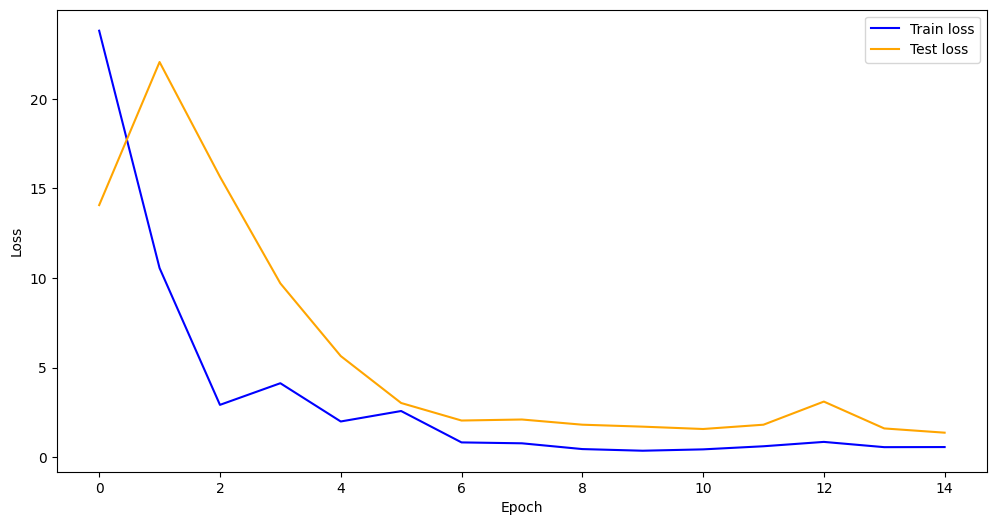

In [256]:
plt.figure(figsize=(12, 6))
plt.plot(range(N_EPOCHS), history_train, c="blue", label="Train loss")
plt.plot(range(N_EPOCHS), history_test, c="orange", label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

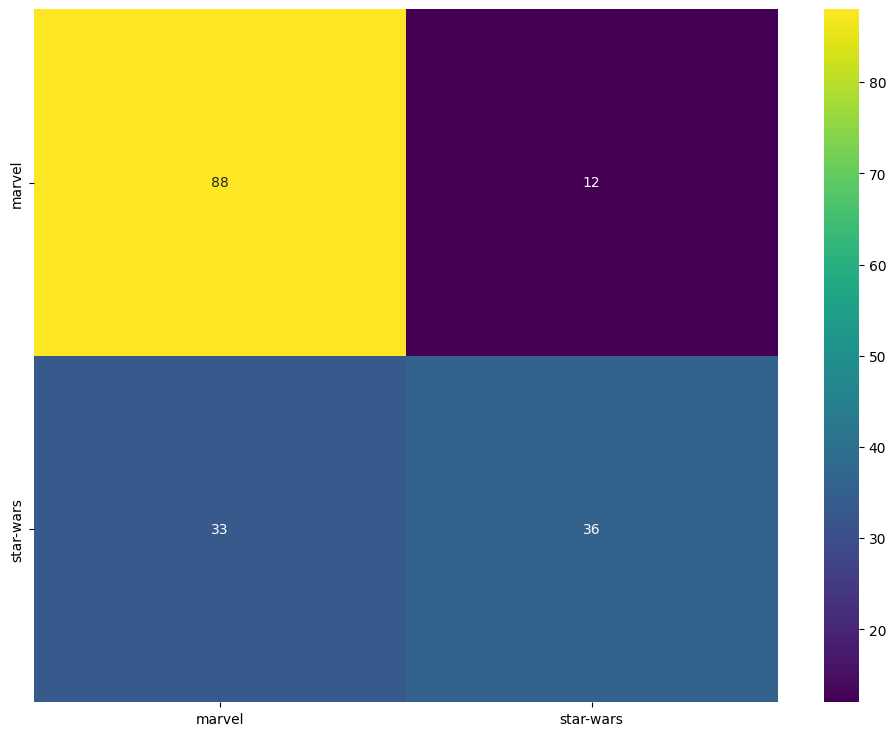

In [257]:
make_confusion_matrix(val_loader_conv, letters_conv_model, train_set.classes, "cpu")

Вывод: модель linear предсказывает картинку чуть хуже модели CNN, однако модель CNN куда более сложно обучать, ввиду более глубокого понимания теории и пересчета размера изображений. Также модель CNN обучается намного дольше модели linear. Общий же результат в 70% можно обосновать довольно плохим датасетом и не идеально подобранными коэффициентами.